In [1]:
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
from typing import TypedDict

In [2]:
class GraphState(TypedDict):
    message: str

In [3]:
def node_1(state):
    state["message"] = f"User mesage: {state["message"]}.\nI have reached Node 1."
    return state

def node_2(state):
    state["message"] = f"{state["message"]}\nAnd now I have reached Node 2. \nAnd I'm exiting the graph"
    return state

In [4]:
workflow = StateGraph(GraphState)

workflow.add_node("node_1", node_1)
workflow.add_node("node_2", node_2)

workflow.add_edge(START, "node_1")
workflow.add_edge("node_1", "node_2")
workflow.add_edge("node_2", END)

graph_compile = workflow.compile()

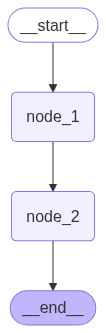

In [5]:
display(Image(graph_compile.get_graph().draw_mermaid_png()))

In [6]:
response = graph_compile.invoke({"message": "Hello World"})

In [7]:
print(response["message"])

User mesage: Hello World.
I have reached Node 1.
And now I have reached Node 2. 
And I'm exiting the graph
